In [44]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from alrd.run_spot import SessionBuffer, DataBuffer, TransitionData, StateData
from alrd.spot_gym.model.robot_state import SpotState

"""
Analyse state observations.

"""

file_path = "/home/bhoffman/Documents/MT_FS24/active-learning-dynamics/collected_data/test20240705-131358/session_buffer.pickle"
with open(file_path, 'rb') as file:
    data = pickle.load(file)

states = data.data_buffers[0].states

[(-6.079673767089844e-05, -0.8949630260467529, 1.8012322187423706, 0.0017583370208740234, -0.8965121507644653, -0.003484010696411133), (-0.019449472427368164, -0.8984220027923584, 1.7970777750015259, 0.001447916030883789, -0.868343710899353, -0.03395366668701172), (-0.06458377838134766, -0.8921310901641846, 1.8014878034591675, 0.004387855529785156, -0.7652746438980103, -0.1496596336364746), (-0.11016082763671875, -0.8921310901641846, 1.8005372285842896, -0.00431370735168457, -0.7888871431350708, -0.16788482666015625), (-0.28075718879699707, -0.8894615173339844, 1.796167016029358, 0.0012195110321044922, -0.8028024435043335, -0.20751261711120605), (-0.30286717414855957, -0.8900808691978455, 1.7966622114181519, 0.012140035629272461, -0.7526742219924927, -0.09833526611328125), (-0.24474549293518066, -0.8898301124572754, 1.7971975803375244, 0.01050567626953125, -0.5967923402786255, 0.03959536552429199), (-0.1265256404876709, -0.8866958618164062, 1.7939139604568481, 0.0046710968017578125, -0

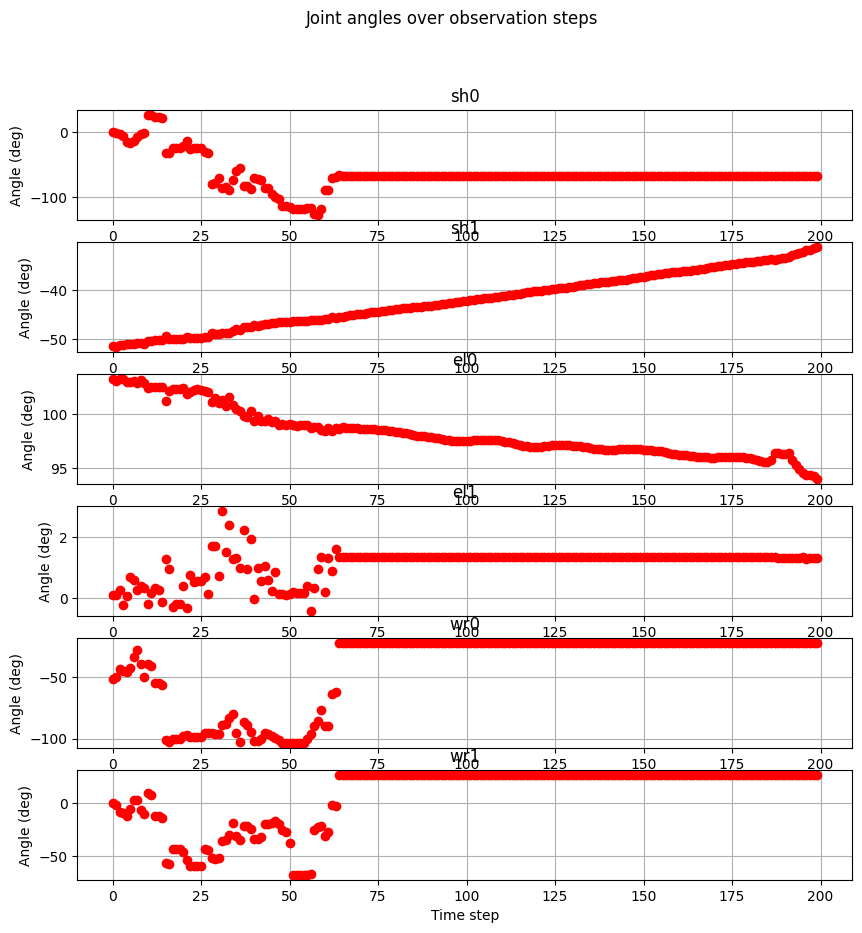

In [47]:
# joint states

arm_joint_states = [state.last_state.arm_joint_positions for state in states]
steps = [state.step for state in states]

fig, axs = plt.subplots(6, 1, figsize=(10, 10))
fig.suptitle('Joint angles over observation steps')
joint_names = ['sh0', 'sh1', 'el0', 'el1', 'wr0', 'wr1']
for i in range(6):
    axs[i].set_title(joint_names[i])
    axs[i].set_ylabel('Angle (deg)')
    axs[i].set_xlabel('Time step')
    axs[i].grid()

step = 0
for joint_state in arm_joint_states:
    for i in range(6):
        axs[i].plot(step, np.rad2deg(list(joint_state)[i]), 'ro')
    step += 1


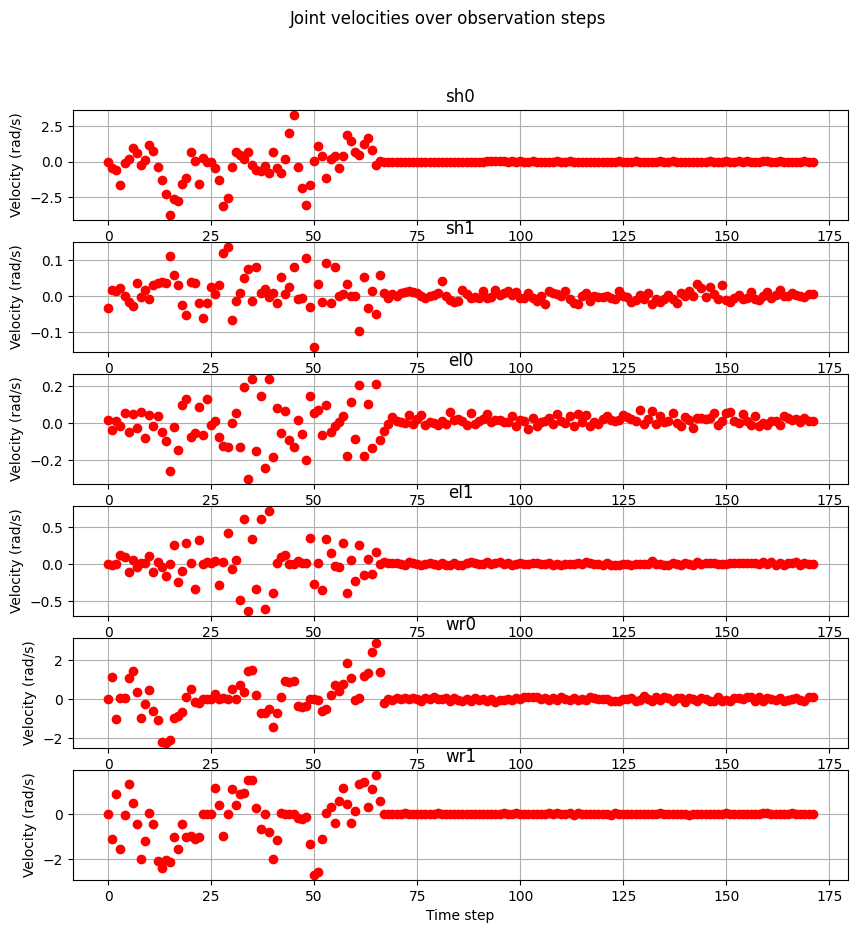

In [38]:
#  joint velocities

# filter for arm joint velocity states only
joint_states = [d[13:] for d in data]

fig, axs = plt.subplots(6, 1, figsize=(10, 10))
fig.suptitle('Joint velocities over observation steps')
joint_names = ['sh0', 'sh1', 'el0', 'el1', 'wr0', 'wr1']
for i in range(6):
    axs[i].set_title(joint_names[i])
    axs[i].set_ylabel('Velocity (rad/s)')
    axs[i].set_xlabel('Time step')
    axs[i].grid()

step = 0
for joint_state in joint_states:
    for i in range(6):
        axs[i].plot(step, joint_state[i], 'ro')
    step += 1

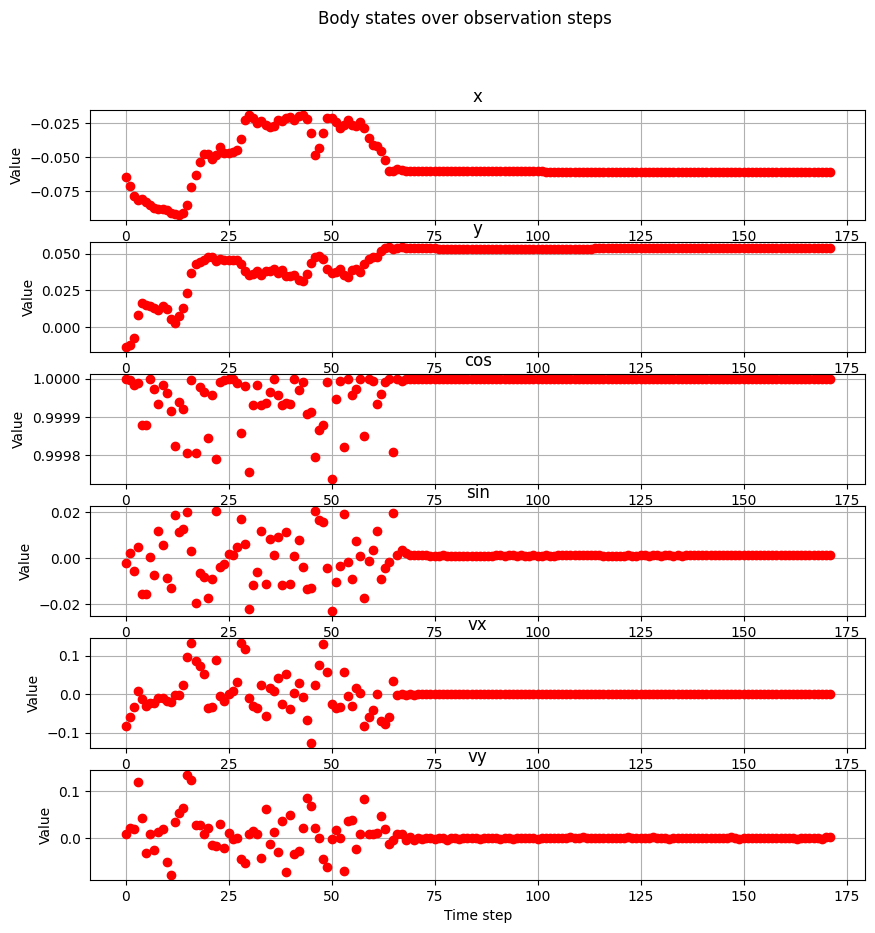

In [36]:
# body states

# filter for body states only
body_states = [d[:6] for d in data]

fig, axs = plt.subplots(6, 1, figsize=(10, 10))
fig.suptitle('Body states over observation steps')
body_names = ['x', 'y', 'cos', 'sin', 'vx', 'vy']
for i in range(6):
    axs[i].set_title(body_names[i])
    axs[i].set_ylabel('Value')
    axs[i].set_xlabel('Time step')
    axs[i].grid()

step = 0
for body_state in body_states:
    for i in range(6):
        axs[i].plot(step, body_state[i], 'ro')
    step += 1